In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('../datasets/pca_weather_scores_w_avgs.csv')
df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,encoded_label
0,-1.323034,-1.211738,1.700028,1.218532,0.335215,0.306708,0.353581,0.158701,-1
1,0.250601,-0.921408,0.904150,0.366094,0.705131,-0.100383,0.669063,1.118114,1
2,-2.709989,0.551550,1.825280,0.839354,0.010922,0.737369,0.288998,0.754685,1
3,-2.561697,0.281380,0.341714,2.184507,-1.815282,-1.065592,0.208383,-0.069061,1
4,-1.780883,1.439028,3.449967,0.946676,-2.072584,0.895238,-0.040505,0.733429,1
...,...,...,...,...,...,...,...,...,...
9682,2.867591,0.628293,-1.847490,-0.302665,-0.292366,-0.156336,-0.064548,-0.507593,-1
9683,3.360234,-0.808020,-0.761282,1.021886,-0.692666,0.012578,-0.100626,-0.749551,-1
9684,4.444428,-0.648468,-0.927133,1.752858,-2.627435,-0.261767,-0.032763,-0.390215,-1
9685,2.590004,1.360342,-1.117115,-0.697377,0.377414,1.330081,-0.111951,-0.253494,1


In [2]:
cols = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8']
features = df[cols]
features

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-1.323034,-1.211738,1.700028,1.218532,0.335215,0.306708,0.353581,0.158701
1,0.250601,-0.921408,0.904150,0.366094,0.705131,-0.100383,0.669063,1.118114
2,-2.709989,0.551550,1.825280,0.839354,0.010922,0.737369,0.288998,0.754685
3,-2.561697,0.281380,0.341714,2.184507,-1.815282,-1.065592,0.208383,-0.069061
4,-1.780883,1.439028,3.449967,0.946676,-2.072584,0.895238,-0.040505,0.733429
...,...,...,...,...,...,...,...,...
9682,2.867591,0.628293,-1.847490,-0.302665,-0.292366,-0.156336,-0.064548,-0.507593
9683,3.360234,-0.808020,-0.761282,1.021886,-0.692666,0.012578,-0.100626,-0.749551
9684,4.444428,-0.648468,-0.927133,1.752858,-2.627435,-0.261767,-0.032763,-0.390215
9685,2.590004,1.360342,-1.117115,-0.697377,0.377414,1.330081,-0.111951,-0.253494


In [3]:
labels = np.ravel(df['encoded_label'])
labels

array([-1,  1,  1, ..., -1,  1,  1], dtype=int64)

In [4]:
from sklearn.model_selection import cross_validate
rf = RandomForestClassifier()


cv_results = cross_validate(rf, features, labels, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'))

del cv_results['score_time']
del cv_results['fit_time']

for metric_name, values in cv_results.items():
    print(f'Metric: {metric_name}')
    #for val in values:
    #    print(f'\t{val}')
    print(f'\tMean: {np.mean(values)}')
    print(f'\tStandard Deviation: {np.std(values)}')


Metric: test_accuracy
	Mean: 0.5179140120598044
	Standard Deviation: 0.01663396355526542
Metric: test_precision
	Mean: 0.5304084285002277
	Standard Deviation: 0.016940858089393288
Metric: test_recall
	Mean: 0.5619335055653475
	Standard Deviation: 0.05484592310724566
Metric: test_f1
	Mean: 0.5443278578360464
	Standard Deviation: 0.02875818578492954


In [5]:
rf.fit(features, labels)

RandomForestClassifier()

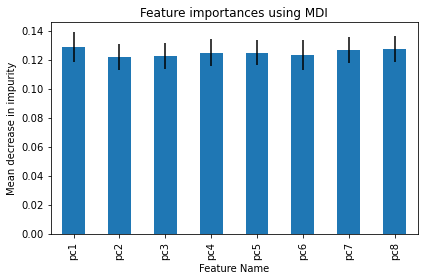

In [6]:
from matplotlib import pyplot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=cols)

fig, ax = pyplot.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Feature Name")
fig.tight_layout()